# STOCK MARKET ANALYSIS AND FORECASTING  💰💰💰




# 1. | Installing and Importing Libraries 📚


In [2]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import statistics
import warnings
import math
from scipy import stats
import matplotlib.dates as mdates
from plotly import tools
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot, iplot
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"C:\Users\netsh\Downloads\QQQ_rands.csv")

values = pd.read_csv(r"C:\Users\netsh\Downloads\VOO_rands.csv")

valdats = pd.read_csv(r"C:\Users\netsh\Downloads\VT_rands.csv")

# 2.| Reading Dataset 👓

In [4]:
data.head().style.background_gradient(cmap='Greens').set_properties(**{'font-family': 'Segoe UI'}).hide_index()



timestamp,open,high,low,close,volume
2023-05-05,322.090000,323.760000,315.115000,322.890000,259445481
2023-04-28,318.770000,322.650000,309.890000,322.560000,991124919
2023-03-31,293.260000,321.170000,285.190000,320.930000,1545364607
2023-02-28,294.410000,313.680000,290.050000,293.560000,1094751646
2023-01-31,268.650000,298.260000,260.340000,294.620000,961927648


In [5]:
values.head()

,timestamp,open,high,low,close,volume
0,2023-05-05,381.730,383.64,370.92,378.97,20454804
1,2023-04-28,375.600,382.12,370.98,382.05,59219145
2,2023-03-31,363.340,376.34,349.76,376.07,98908997
3,2023-02-28,372.440,384.41,361.73,364.11,70631595
4,2023-01-31,353.181,375.08,347.19,373.44,76631756


In [6]:
valdats.head()

,timestamp,open,high,low,close,volume
0,2023-05-05,93.30,93.6599,91.350,93.16,5996063
1,2023-04-28,92.10,93.7806,91.230,93.40,25614082
2,2023-03-31,90.17,92.2500,86.125,92.09,53242096
3,2023-02-28,92.68,94.8740,89.190,89.83,39226279
4,2023-01-31,86.88,93.2400,85.711,92.78,54605961


In [7]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

## Overview of QQQ

Qqq is a NASDAQ EFT called Invesco QQQ trust that tracks the performance of 100 large tech companies, Amazon, FB, PayPal, etc

# 3. | Applying Descriptive statistics to QQQ 📊

In [8]:
print("The mean for open price is:",data["open"].mean()),
print("The median for open price is:",data["open"].median())
print("The standard deviation for open price is:",data["open"].std())
print("The minimum value for open price is:",data["open"].min())
print("The maximum value for open price is:",data["open"].max())
print("The 75th quantile for open price is:",data["open"].quantile(0.75))
print("The 50th quantile for open price is:",data["open"].quantile(0.50))
print("The 25th quantile for open price is:",data["open"].quantile(0.25))
print("The interquantile range for open price is:",data["open"].quantile(0.75) - data["open"].quantile(0.25))
print("The Variance for open price is:",data["open"].var())
print("The mode for open price is:",data["open"].mode())
print("The z-score of the open price is", stats.zscore(data["open"]))
print("The skew for open price is:",data["open"].skew())
print("The Kurtosis for open price is:",data["open"].kurt())

The mean for open price is: 108.9312319148936
The median for open price is: 66.5
The standard deviation for open price is: 94.26558657900159
The minimum value for open price is: 20.91
The maximum value for open price is: 399.05
The 75th quantile for open price is: 148.04
The 50th quantile for open price is: 66.5
The 25th quantile for open price is: 41.065
The interquantile range for open price is: 106.975
The Variance for open price is: 8886.000813083245
The mode for open price is: 0     38.88
1    214.50
Name: open, dtype: float64
The z-score of the open price is 0      2.265278
1      2.229995
2      1.958896
3      1.971117
4      1.697361
         ...   
277   -0.012022
278    1.121899
279    0.745696
280    0.886825
281    0.421567
Name: open, Length: 282, dtype: float64
The skew for open price is: 1.4337836116604936
The Kurtosis for open price is: 1.0741405522360172


In [9]:
print("The mean for volume is:",data["volume"].mean()),
print("The median for volume is:",data["volume"].median())
print("The standard deviation for volume is:",data["volume"].std())
print("The minimum value for volume is:",data["volume"].min())
print("The maximum value for volume is:",data["volume"].max())
print("The 75th quantile for volume is:",data["volume"].quantile(0.75))
print("The 50th quantile for volume is:",data["volume"].quantile(0.50))
print("The 25th quantile for volume is:",data["volume"].quantile(0.25))
print("The interquantile range for volume is:",data["volume"].quantile(0.75) - data["volume"].quantile(0.25))
print("The Variance for volume is:",data["volume"].var())
print("The mode for volume is:",data["volume"].mode())
print("The z-score of the volume is", stats.zscore(data["volume"]))
print("The skew for volume is:",data["volume"].skew())
print("The Kurtosis for volume is:",data["volume"].kurt())

The mean for volume is: 1434820990.1843972
The median for volume is: 1207131850.0
The standard deviation for volume is: 934753167.6223533
The minimum value for volume is: 232677800
The maximum value for volume is: 7240779800
The 75th quantile for volume is: 1894041625.0
The 50th quantile for volume is: 1207131850.0
The 25th quantile for volume is: 720325876.0
The interquantile range for volume is: 1173715749.0
The Variance for volume is: 8.737634843800234e+17
The mode for volume is: 0       232677800
1       259445481
2       287584900
3       291715900
4       307437473
          ...    
277    3953264300
278    4567776300
279    4828694600
280    5188670400
281    7240779800
Name: volume, Length: 282, dtype: int64
The z-score of the volume is 0     -1.259653
1     -0.475510
2      0.118470
3     -0.364453
4     -0.506801
         ...   
277   -0.810646
278   -1.028022
279   -1.229496
280   -1.225069
281   -1.288340
Name: volume, Length: 282, dtype: float64
The skew for volume is: 1.8

In [10]:
print("The mean for close price is:",data["close"].mean()),
print("The median for close price is:",data["close"].median())
print("The standard deviation for close price is:",data["close"].std())
print("The minimum value for close price is:",data["close"].min())
print("The maximum value for close price is:",data["close"].max())
print("The 75th quantile for close price is:",data["close"].quantile(0.75))
print("The 50th quantile for close price is:",data["close"].quantile(0.50))
print("The 25th quantile for close price is:",data["close"].quantile(0.25))
print("The interquantile range for close price is:",data["close"].quantile(0.75) - data["close"].quantile(0.25))
print("The Variance for close price is:",data["close"].var())
print("The mode for close price is:",data["close"].mode())
print("The z-score of the close price is", stats.zscore(data["close"]))
print("The skew for close price is:",data["close"].skew())
print("The Kurtosis for close price is:",data["close"].kurt())

The mean for close price is: 109.2789840425532
The median for close price is: 65.46504999999999
The standard deviation for close price is: 94.7752990179452
The minimum value for close price is: 20.72
The maximum value for close price is: 397.85
The 75th quantile for close price is: 150.6625
The 50th quantile for close price is: 65.46504999999999
The 25th quantile for close price is: 40.995000000000005
The interquantile range for close price is: 109.66749999999999
The Variance for close price is: 8982.357303940924
The mode for close price is: 0    35.38
1    36.57
2    38.87
3    38.91
Name: close, dtype: float64
The z-score of the close price is 0      2.257875
1      2.254387
2      2.237158
3      1.947856
4      1.959060
         ...   
277   -0.153572
278    0.002336
279    1.101619
280    0.741181
281    0.777119
Name: close, Length: 282, dtype: float64
The skew for close price is: 1.4151913177454412
The Kurtosis for close price is: 0.9824203327389838


In [11]:
data.head()

,timestamp,open,high,low,close,volume
0,2023-05-05,322.09,323.76,315.115,322.89,259445481
1,2023-04-28,318.77,322.65,309.890,322.56,991124919
2,2023-03-31,293.26,321.17,285.190,320.93,1545364607
3,2023-02-28,294.41,313.68,290.050,293.56,1094751646
4,2023-01-31,268.65,298.26,260.340,294.62,961927648


In [12]:
# Extracting year and month from the 'Date' column and adding them as separate columns
data['Year'] = data['timestamp'].dt.year
data['Month'] = data['timestamp'].dt.month


In [13]:
# Printing the shape of the 'data' dataframe
print(f'data: {data.shape[0]} rows, {data.shape[1]} columns')

data: 282 rows, 8 columns


In [14]:
data.head()

,timestamp,open,high,low,close,volume,Year,Month
0,2023-05-05,322.09,323.76,315.115,322.89,259445481,2023,5
1,2023-04-28,318.77,322.65,309.890,322.56,991124919,2023,4
2,2023-03-31,293.26,321.17,285.190,320.93,1545364607,2023,3
3,2023-02-28,294.41,313.68,290.050,293.56,1094751646,2023,2
4,2023-01-31,268.65,298.26,260.340,294.62,961927648,2023,1


# 4. GRAPHICALLY REPRESENTING QQQ DATA

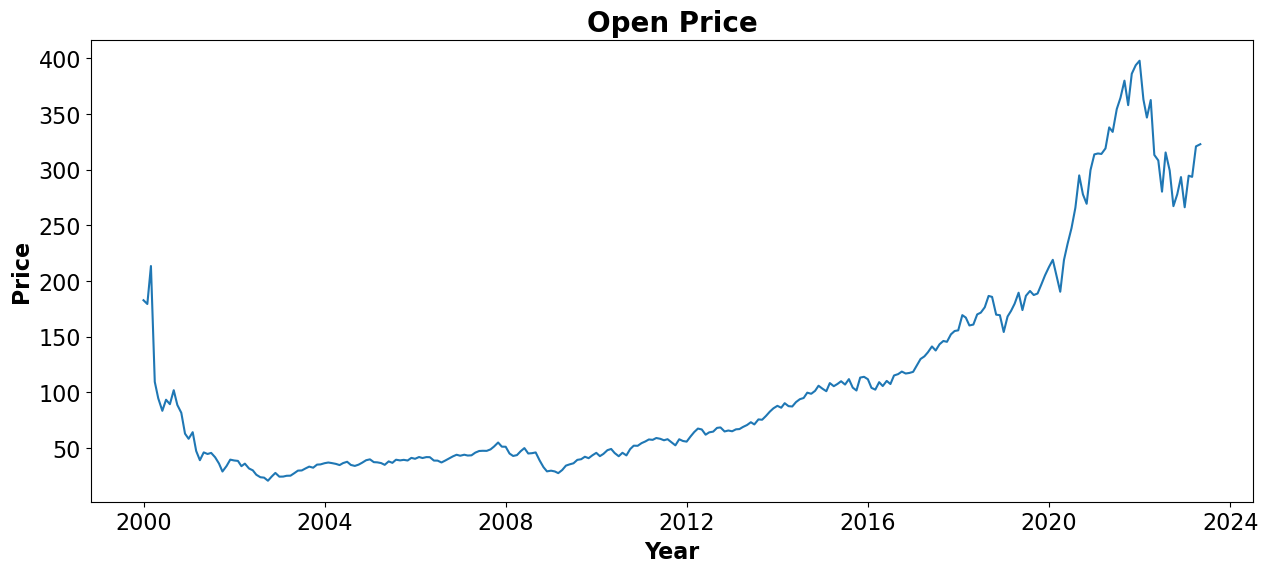

In [15]:
# Line plot
fig, ax = plt.subplots(figsize=(15, 6))
#sns.lineplot(data['timestamp'], data['open'] )
sns.lineplot(data, x = 'timestamp', y = 'close')

# Formatting
ax.set_title('Open Price', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))

# Adjusting tick label sizes for better readability
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

# Plotting the Volume

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the QQQ

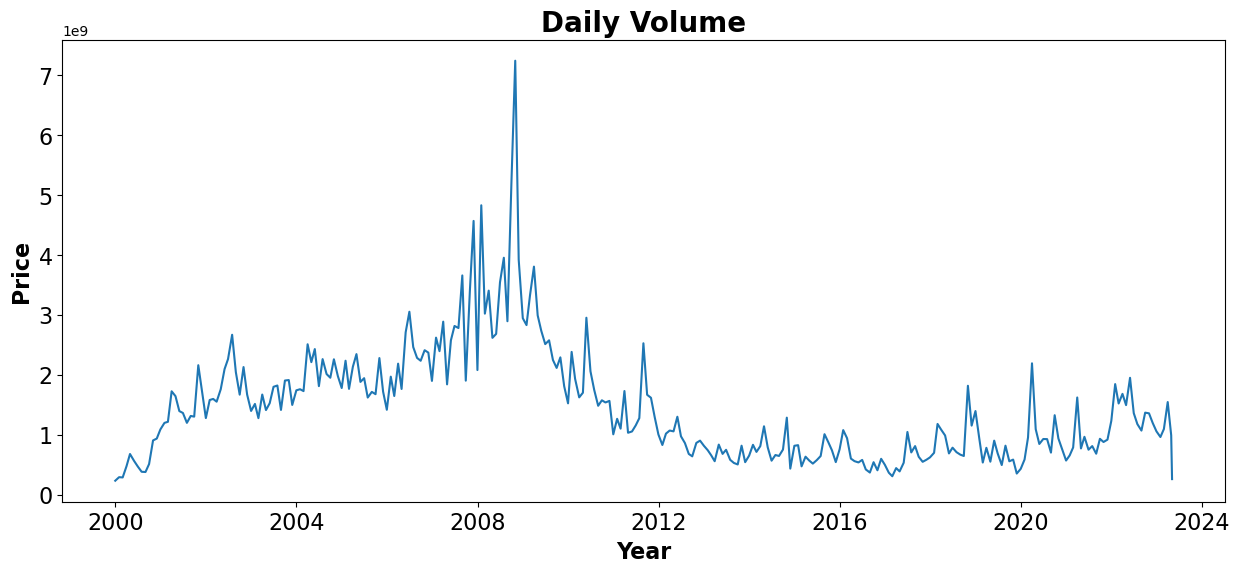

In [16]:
# Plot Daily Volume Lineplot
fig, ax = plt.subplots(figsize=(15, 6))
#sns.lineplot(data['timestamp'], data['volume'] )
sns.lineplot(data, x = 'timestamp', y = 'volume')


# Formatting
ax.set_title('Daily Volume', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

The graph exhibits significant noise due to the use of a daily scale. By opting for the mean trading volume per month, rather than the daily trading volume, the resulting visualization is expected to be more comprehensible and visually appealing. 

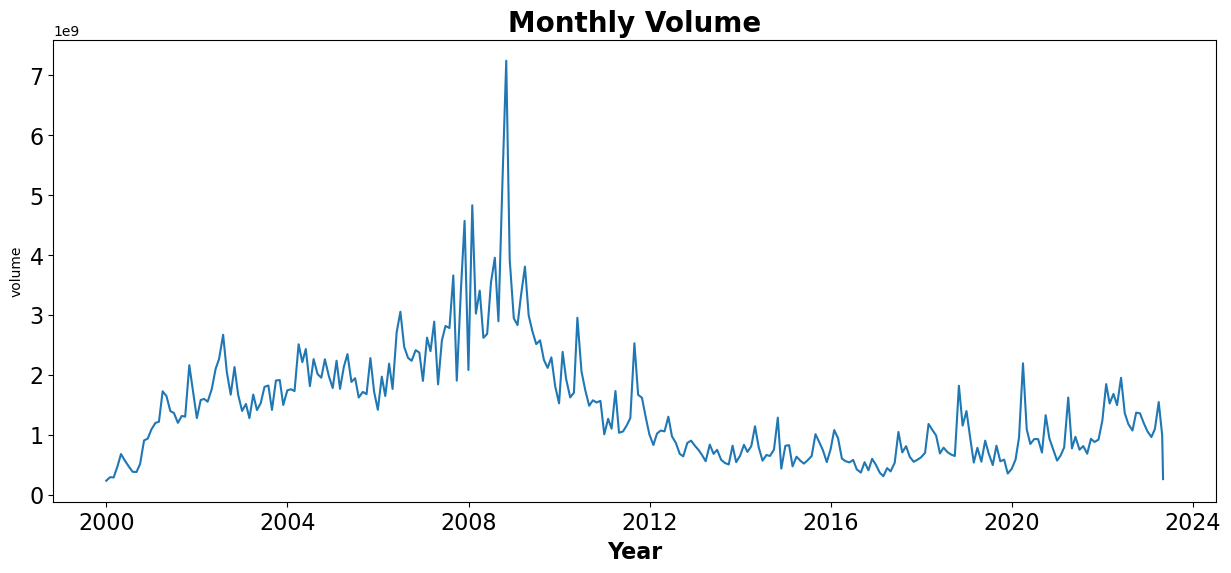

In [17]:
# Create a copy of the 'Date' and 'Volume' columns
y = data[['timestamp','volume']].copy()

# Set the index to 'timestamp' and convert it to datetime format
y.set_index('timestamp', inplace=True)
y.index = pd.to_datetime(y.index)

# Resample the time series to monthly and compute the mean of each month
y = y.resample('1M').mean()

# Add the 'timestamp' column back to the DataFrame
y['timestamp'] = y.index

# Plot the monthly volume time series
fig, ax = plt.subplots(figsize=(15, 6))
#sns.lineplot(y['timestamp'], y['volume'] )
sns.lineplot(data, x = 'timestamp', y = 'volume')

# Set the title and axes labels
ax.set_title('Monthly Volume', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

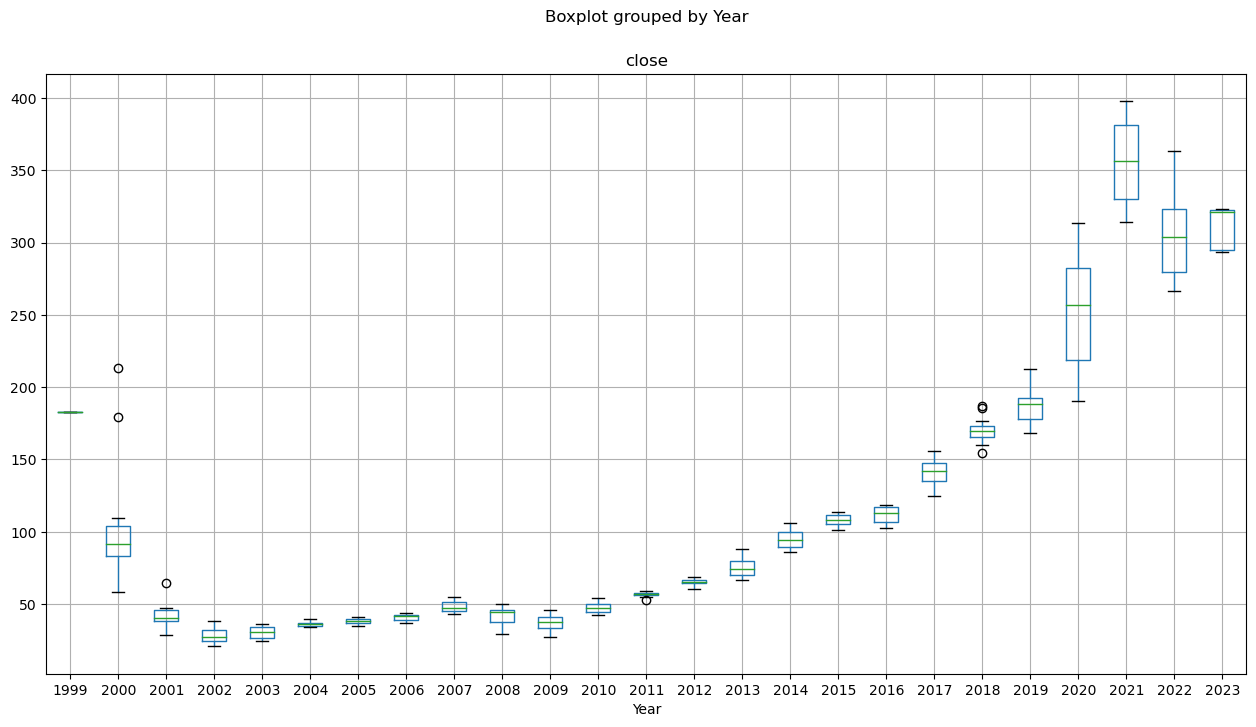

In [19]:
data.boxplot(column = 'close', by = 'Year', figsize = (15,8))
plt.show()

It is immediately evident that 2021 was a highly successful year for the companies, This constitutes the most significant increase within the past decade.

<Axes: xlabel='timestamp'>

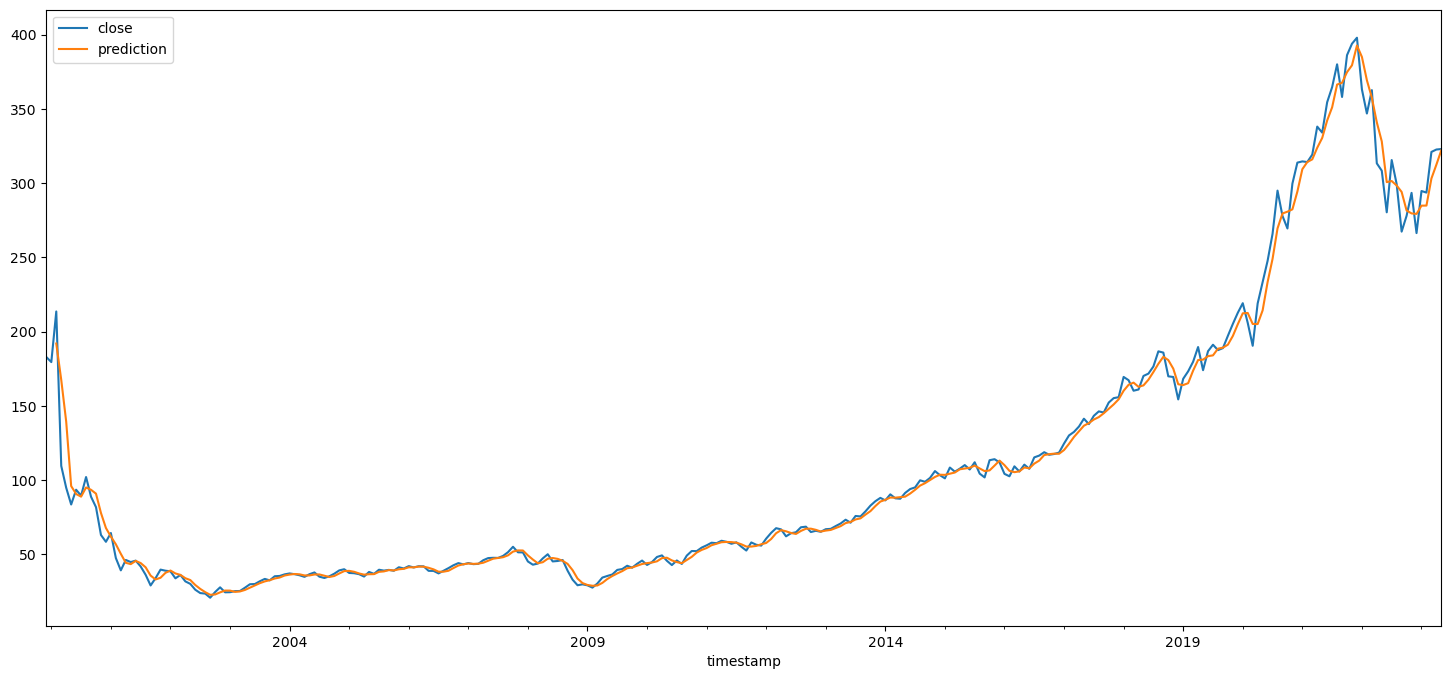

In [20]:
# Aggregating the Time Series to a monthly scaled index
y = data[['timestamp','close']].copy()
y.set_index('timestamp', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

# Compute rolling mean with window size of 3
y['prediction'] = y.rolling(window=3).mean() 

# Plot the resulting time series
y.plot(figsize=(18,8))

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

Text(0.5, 1.0, 'Correlation of stock closing price')

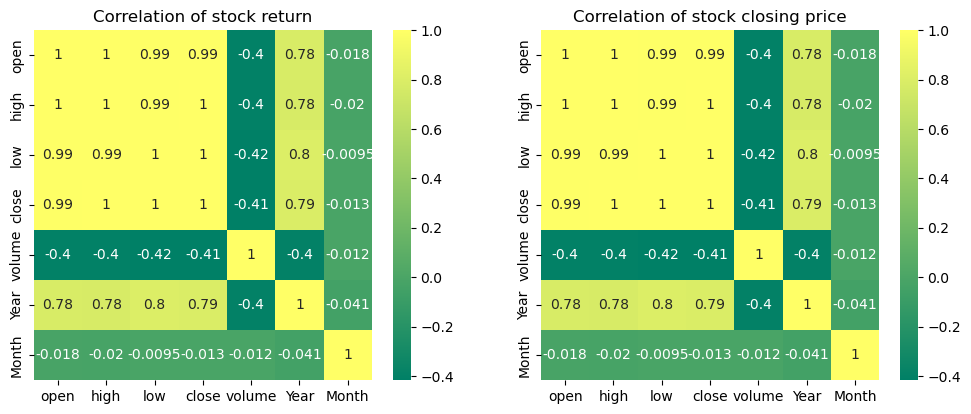

In [21]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(data.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(data.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our PairPlot we see here numerically and visually that the stock return and closing price had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

In [22]:
import sklearn
print(sklearn.__version__)

#X_train, X_test, y_train, y_test = train_test_split(data[['close']], df[['open']], test_size=.2)

1.2.1


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
 #y_train, y_test = train_test_split(data[['close']], test_size=.2)
    
X_train, X_test, y_train, y_test = train_test_split(data[['close']], data[['close']], test_size=.2)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:

# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[1.]]
Mean Absolute Error: 0.0
Coefficient of Determination: 1.0


So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

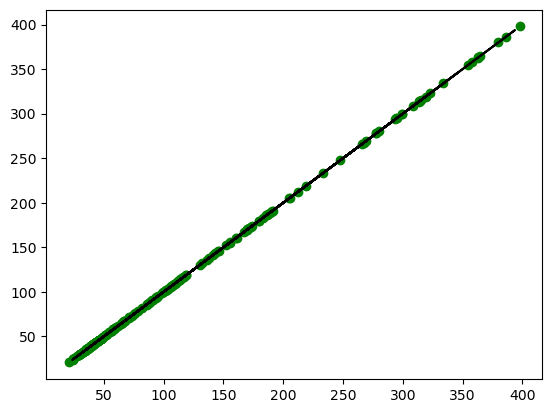

In [28]:
plt.scatter(X_train, y_train,color='g') 

plt.plot(X_test, y_pred,color='k') 



plt.show()

A scatter plot is a valuable tool for examining the relationship between each observation and its lag. It displays the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis.

If the points cluster along a diagonal line extending from the bottom-left to the top-right of the plot, it indicates a positive correlation relationship.
If the points cluster along a diagonal line extending from the top-left to the bottom-right, it signifies a negative correlation relationship.
Both types of relationships are useful, as they can be modeled.
The closer the points are to the diagonal line, the stronger the relationship; the more spread out the points are from the line, the weaker the relationship.
A concentration of points in the center or a dispersion across the plot suggests a weak or non-existent relationship

# 5. | Overview of VOO 

Vanguard S&P 500 ETF which tracks 500 large cap US stocks,over the past 10 years it has had an average annual return of around 15%

## 5.1 Applying Descriptive statistics to VOO DATA

In [29]:
print("The mean for open price is:",values["open"].mean()),
print("The median for open price is:",values["open"].median())
print("The standard deviation for open price is:",values["open"].std())
print("The minimum value for open price is:",values["open"].min())
print("The maximum value for open price is:",values["open"].max())
print("The 75th quantile for open price is:",values["open"].quantile(0.75))
print("The 50th quantile for open price is:",values["open"].quantile(0.50))
print("The 25th quantile for open price is:",values["open"].quantile(0.25))
print("The interquantile range for open price is:",values["open"].quantile(0.75) - values["open"].quantile(0.25))
print("The Variance for open price is:",values["open"].var())
print("The mode for open price is:",values["open"].mode())
print("The z-score of the open price is", stats.zscore(values["open"]))
print("The skew for open price is:",values["open"].skew())
print("The Kurtosis for open price is:",values["open"].kurt())

The mean for open price is: 215.8276125
The median for open price is: 208.15
The standard deviation for open price is: 110.64495630155804
The minimum value for open price is: 51.41
The maximum value for open price is: 437.93
The 75th quantile for open price is: 281.13
The 50th quantile for open price is: 208.15
The 25th quantile for open price is: 162.585
The interquantile range for open price is: 118.54499999999999
The Variance for open price is: 12242.306354973687
The mode for open price is: 0    189.29
Name: open, dtype: float64
The z-score of the open price is 0      1.504369
1      1.448783
2      1.337612
3      1.420129
4      1.245492
         ...   
147   -1.419904
148   -1.431420
149   -1.458715
150   -1.463248
151   -1.480659
Name: open, Length: 152, dtype: float64
The skew for open price is: 0.09605152382103917
The Kurtosis for open price is: -0.9193743322212873


In [30]:
print("The mean for volume is:",values["volume"].mean()),
print("The median for volume is:",values["volume"].median())
print("The standard deviation for volume is:",values["volume"].std())
print("The minimum value for volume is:",values["volume"].min())
print("The maximum value for volume is:",values["volume"].max())
print("The 75th quantile for volume is:",values["volume"].quantile(0.75))
print("The 50th quantile for volume is:",values["volume"].quantile(0.50))
print("The 25th quantile for volume is:",values["volume"].quantile(0.25))
print("The interquantile range for volume is:",values["volume"].quantile(0.75) - values["volume"].quantile(0.25))
print("The Variance for volume is:",values["volume"].var())
print("The mode for volume is:",values["volume"].mode())
print("The z-score of the volume is", stats.zscore(values["volume"]))
print("The skew for volume is:",values["volume"].skew())
print("The Kurtosis for volume is:",values["volume"].kurt())

The mean for volume is: 54309911.046052635
The median for volume is: 46436465.5
The standard deviation for volume is: 40422069.793889746
The minimum value for volume is: 1902200
The maximum value for volume is: 280853662
The 75th quantile for volume is: 71053652.5
The 50th quantile for volume is: 46436465.5
The 25th quantile for volume is: 27646456.5
The interquantile range for volume is: 43407196.0
The Variance for volume is: 1633943726422094.0
The mode for volume is: 0        1902200
1        2139800
2        3339400
3        4603600
4        4909400
         ...    
147    142808687
148    148503528
149    178123502
150    209277200
151    280853662
Name: volume, Length: 152, dtype: int64
The z-score of the volume is 0     -0.840309
1      0.121851
2      1.106982
3      0.405116
4      0.554045
         ...   
147   -1.210952
148   -1.129515
149   -1.265126
150   -1.294901
151   -1.300798
Name: volume, Length: 152, dtype: float64
The skew for volume is: 1.9931190025786705
The Kurto

In [31]:
print("The mean for close price is:",values["close"].mean()),
print("The median for close price is:",values["close"].median())
print("The standard deviation for close price is:",values["close"].std())
print("The minimum value for close price is:",values["close"].min())
print("The maximum value for close price is:",values["close"].max())
print("The 75th quantile for close price is:",values["close"].quantile(0.75))
print("The 50th quantile for close price is:",values["close"].quantile(0.50))
print("The 25th quantile for close price is:",values["close"].quantile(0.25))
print("The interquantile range for close price is:",values["close"].quantile(0.75) - values["close"].quantile(0.25))
print("The Variance for close price is:",values["close"].var())
print("The mode for close price is:",values["close"].mode())
print("The z-score of the close price is", stats.zscore(values["close"]))
print("The skew for close price is:",values["close"].skew())
print("The Kurtosis for close price is:",values["close"].kurt())

The mean for close price is: 217.57927631578949
The median for close price is: 212.66
The standard deviation for close price is: 110.24337839947471
The minimum value for close price is: 51.76
The maximum value for close price is: 436.57
The 75th quantile for close price is: 284.735
The 50th quantile for close price is: 212.66
The 25th quantile for close price is: 165.07
The interquantile range for close price is: 119.66500000000002
The Variance for close price is: 12153.602480929765
The mode for close price is: 0    248.79
Name: close, dtype: float64
The z-score of the close price is 0      1.468789
1      1.496819
2      1.442396
3      1.333551
4      1.418461
         ...   
147   -1.426002
148   -1.444568
149   -1.456217
150   -1.487887
151   -1.487341
Name: close, Length: 152, dtype: float64
The skew for close price is: 0.07326126009111598
The Kurtosis for close price is: -0.9243097738074768


In [32]:
# Extracting year and month from the 'Date' column and adding them as separate columns

values.head()



,timestamp,open,high,low,close,volume
0,2023-05-05,381.730,383.64,370.92,378.97,20454804
1,2023-04-28,375.600,382.12,370.98,382.05,59219145
2,2023-03-31,363.340,376.34,349.76,376.07,98908997
3,2023-02-28,372.440,384.41,361.73,364.11,70631595
4,2023-01-31,353.181,375.08,347.19,373.44,76631756


In [33]:
values['timestamp'] = pd.to_datetime(values['timestamp'])

In [34]:
values['Year'] = values['timestamp'].dt.year
values['Month'] = values['timestamp'].dt.month

# 5.2  GRAPHICALLY REPRESENTING VOO DATA 📊

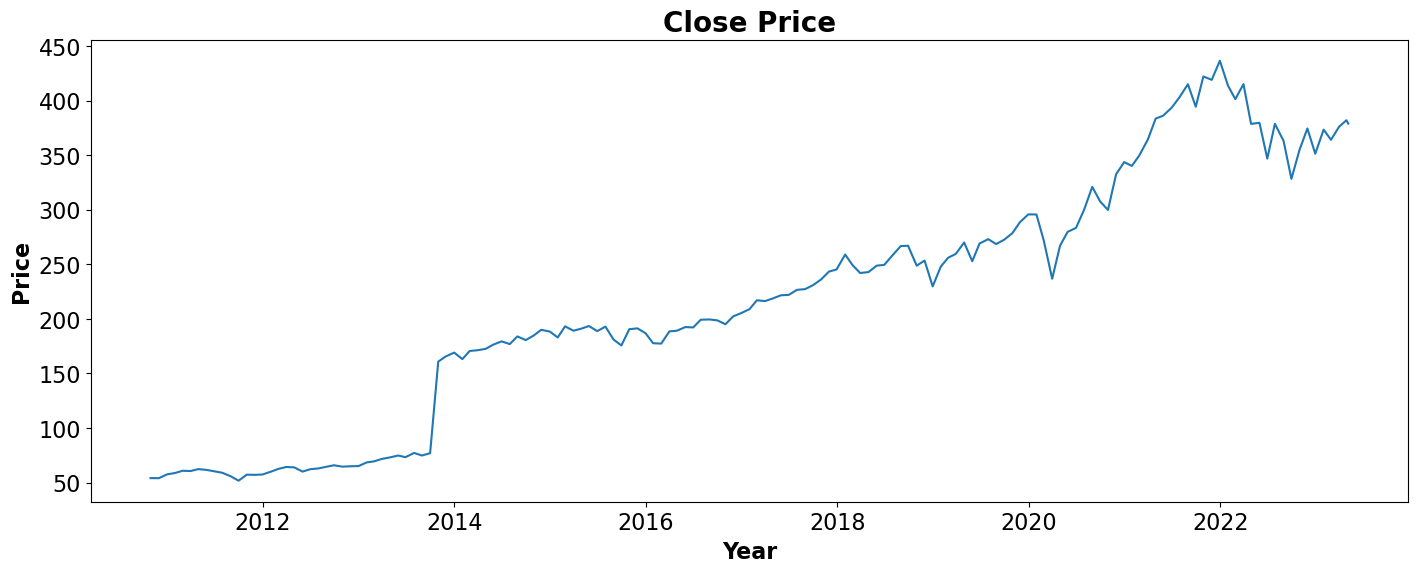

In [35]:
# Line plot
fig, ax = plt.subplots(figsize=(17, 6))
#sns.lineplot(data['timestamp'], data['open'] )
sns.lineplot(values, x = 'timestamp', y = 'close')

# Formatting
ax.set_title('Close Price', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))

# Adjusting tick label sizes for better readability
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

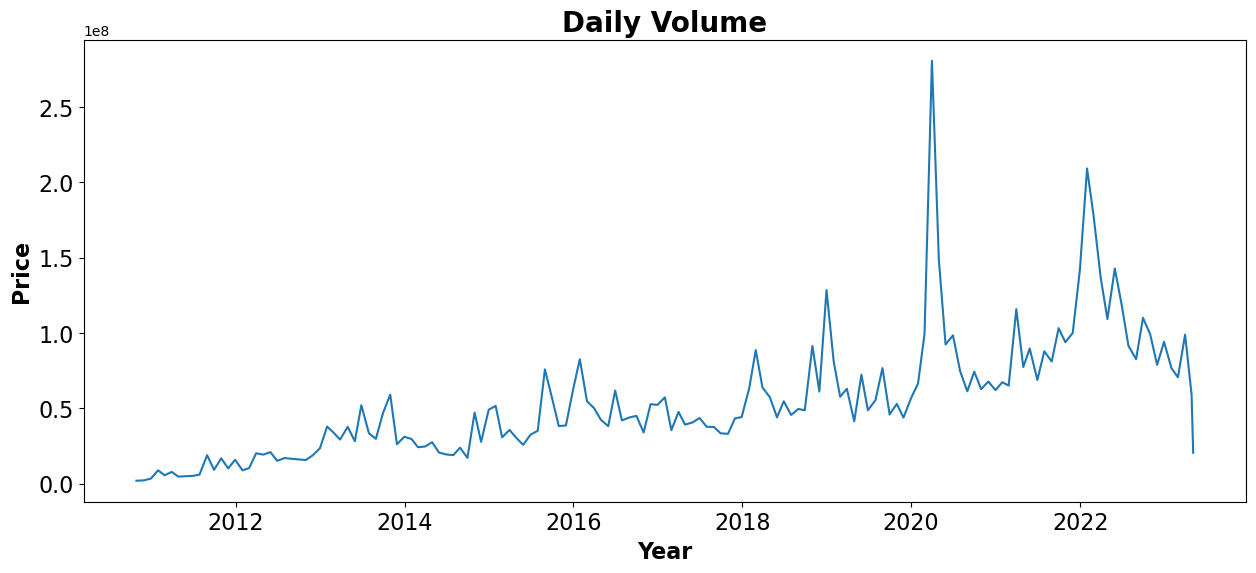

In [36]:
# Plot Daily Volume Lineplot
fig, ax = plt.subplots(figsize=(15, 6))
#sns.lineplot(data['timestamp'], data['volume'] )
sns.lineplot(values, x = 'timestamp', y = 'volume')


# Formatting
ax.set_title('Daily Volume', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

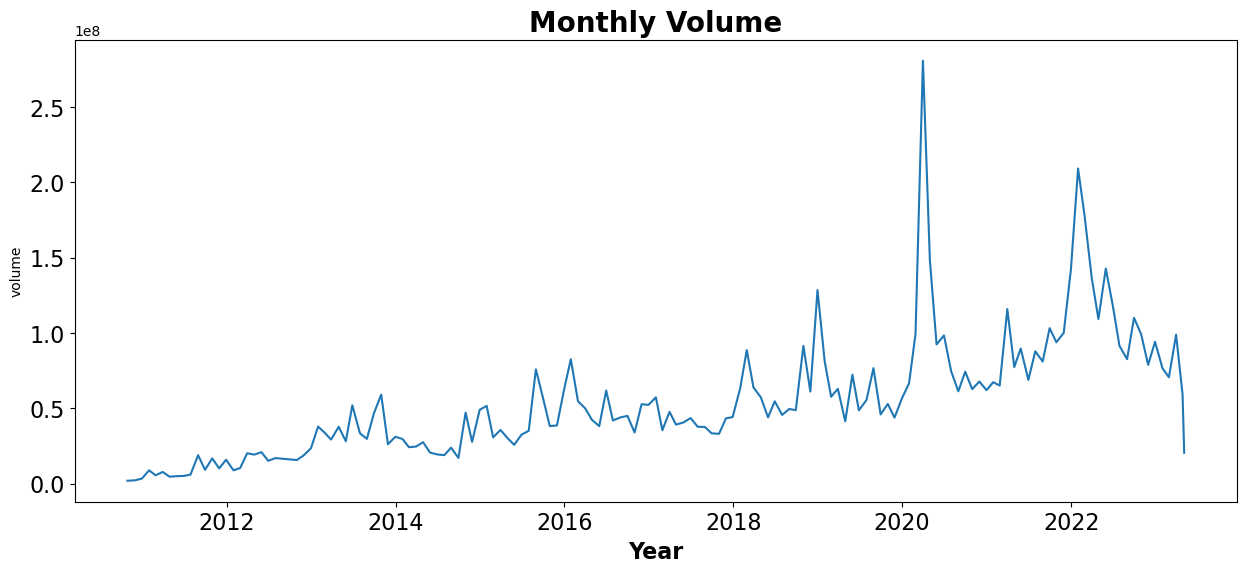

In [37]:
# Create a copy of the 'Date' and 'Volume' columns
y = data[['timestamp','volume']].copy()

# Set the index to 'timestamp' and convert it to datetime format
y.set_index('timestamp', inplace=True)
y.index = pd.to_datetime(y.index)

# Resample the time series to monthly and compute the mean of each month
y = y.resample('1M').mean()

# Add the 'timestamp' column back to the DataFrame
y['timestamp'] = y.index

# Plot the monthly volume time series
fig, ax = plt.subplots(figsize=(15, 6))
#sns.lineplot(y['timestamp'], y['volume'] )
sns.lineplot(values, x = 'timestamp', y = 'volume')

# Set the title and axes labels
ax.set_title('Monthly Volume', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

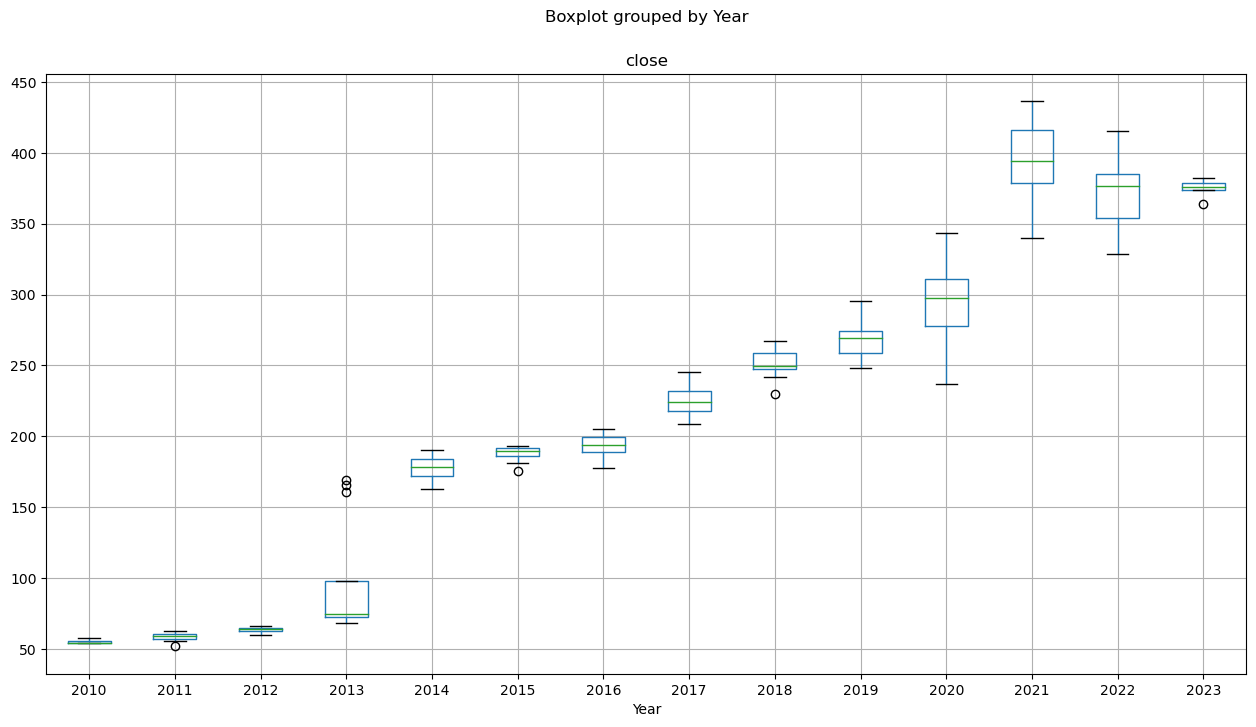

In [38]:
values.boxplot(column = 'close', by = 'Year', figsize = (15,8))
plt.show()

<Axes: xlabel='timestamp'>

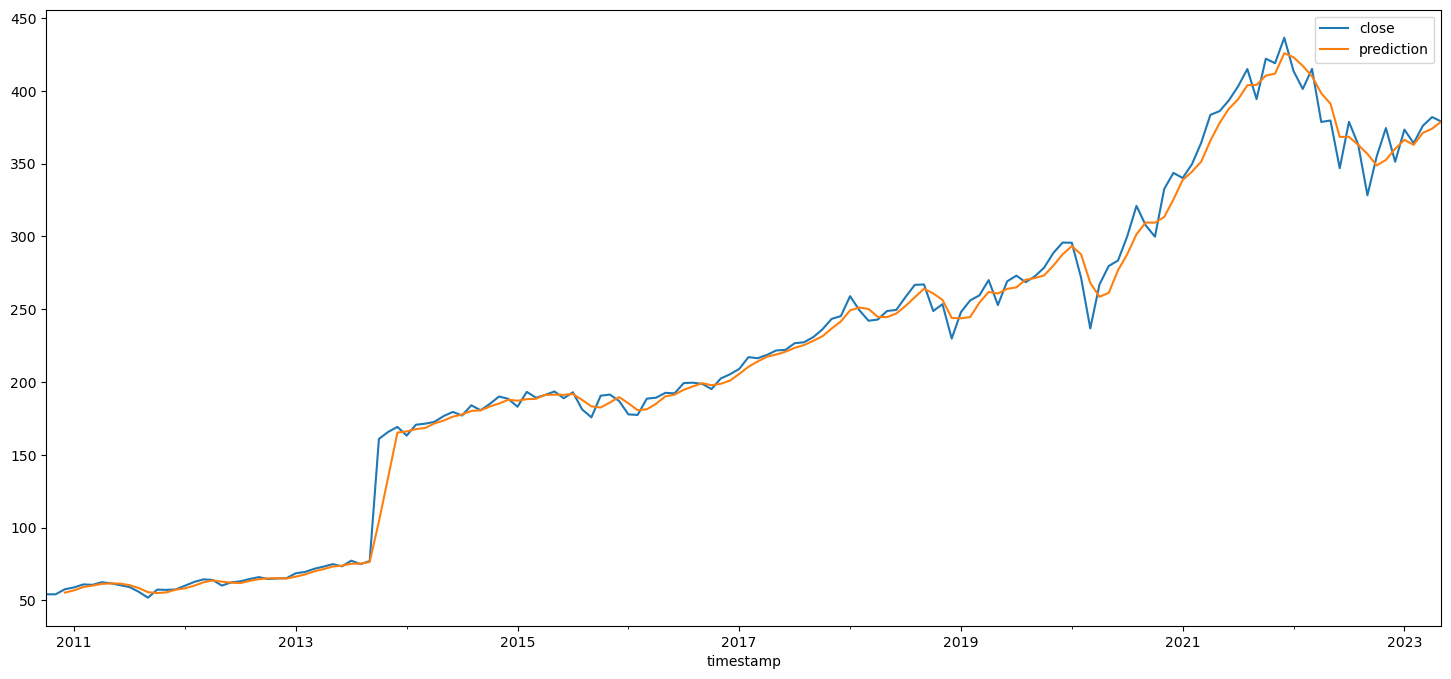

In [39]:
# Aggregating the Time Series to a monthly scaled index
y = values[['timestamp','close']].copy()
y.set_index('timestamp', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

# Compute rolling mean with window size of 3
y['prediction'] = y.rolling(window=3).mean() 

# Plot the resulting time series
y.plot(figsize=(18,8))

Text(0.5, 1.0, 'Correlation of stock closing price')

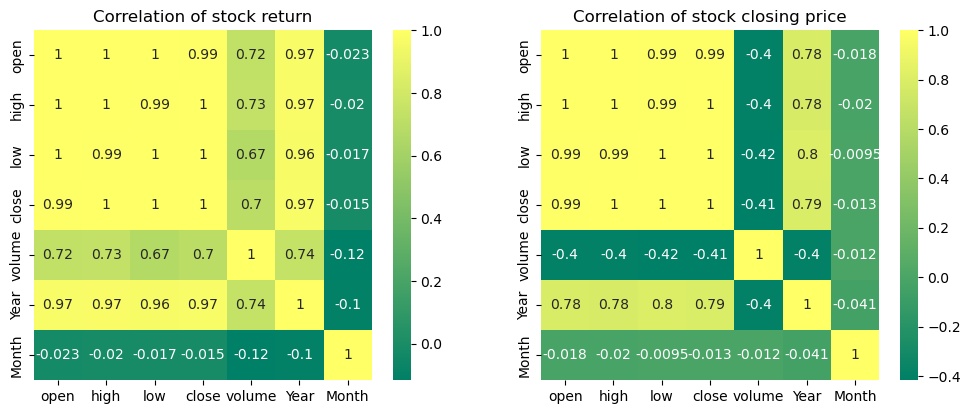

In [40]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(values.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(data.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(values[['close']], values[['close']], test_size=.2)

In [42]:
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[1.]]
Mean Absolute Error: 3.8506832131515104e-14
Coefficient of Determination: 1.0


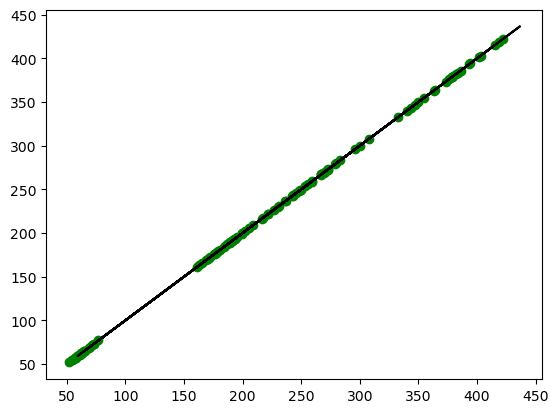

In [44]:
plt.scatter(X_train, y_train,color='g') 

plt.plot(X_test, y_pred,color='k') 



plt.show()

# 6. | Overview of VT Data

Vanguard Total world stock ETF which provides exposure to stocks of companies located in developed and emerging markets around the world, average annual return of around 9 % over the past 10 years

# 6.1 Applying Descriptive statistics to VT DATA


In [45]:
valdats.describe()

,open,high,low,close,volume
count,179.000000,179.000000,179.000000,179.000000,1.790000e+02
mean,63.882176,65.970848,61.362547,63.972345,2.165426e+07
std,19.120857,19.402989,18.708817,19.101174,2.307889e+07
min,26.230000,30.452400,24.360000,26.600000,7.199000e+05
25%,48.645000,49.945000,46.525000,48.370000,4.481850e+06
50%,60.700000,62.110000,59.190000,60.950000,1.155093e+07
75%,75.165000,76.975000,72.705000,75.160000,3.285035e+07
max,107.910000,109.388000,103.850000,107.430000,1.176021e+08


In [46]:
valdats['timestamp'] = pd.to_datetime(valdats['timestamp'])

In [47]:
valdats['Year'] = valdats['timestamp'].dt.year
valdats['Month'] = valdats['timestamp'].dt.month

# 6.2 GRAPHICALLY REPRESENTING VT Data

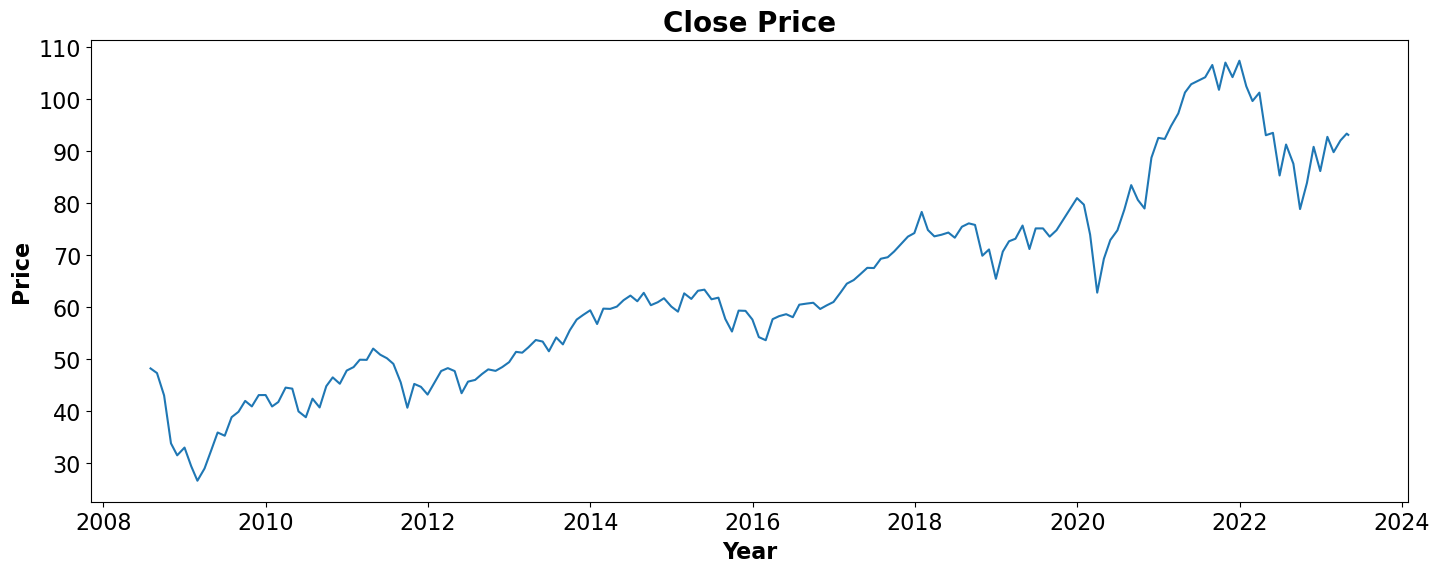

In [48]:
# Line plot
fig, ax = plt.subplots(figsize=(17, 6))
#sns.lineplot(data['timestamp'], data['open'] )
sns.lineplot(valdats, x = 'timestamp', y = 'close')

# Formatting
ax.set_title('Close Price', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))

# Adjusting tick label sizes for better readability
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

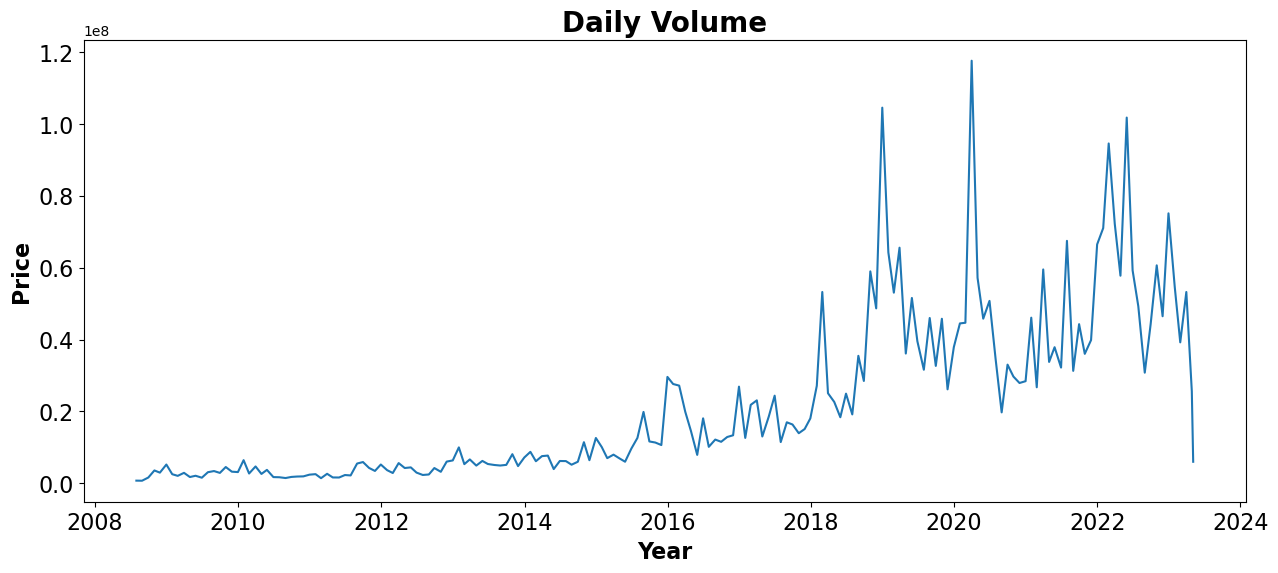

In [49]:
# Plot Daily Volume Lineplot
fig, ax = plt.subplots(figsize=(15, 6))
#sns.lineplot(data['timestamp'], data['volume'] )
sns.lineplot(valdats, x = 'timestamp', y = 'volume')


# Formatting
ax.set_title('Daily Volume', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

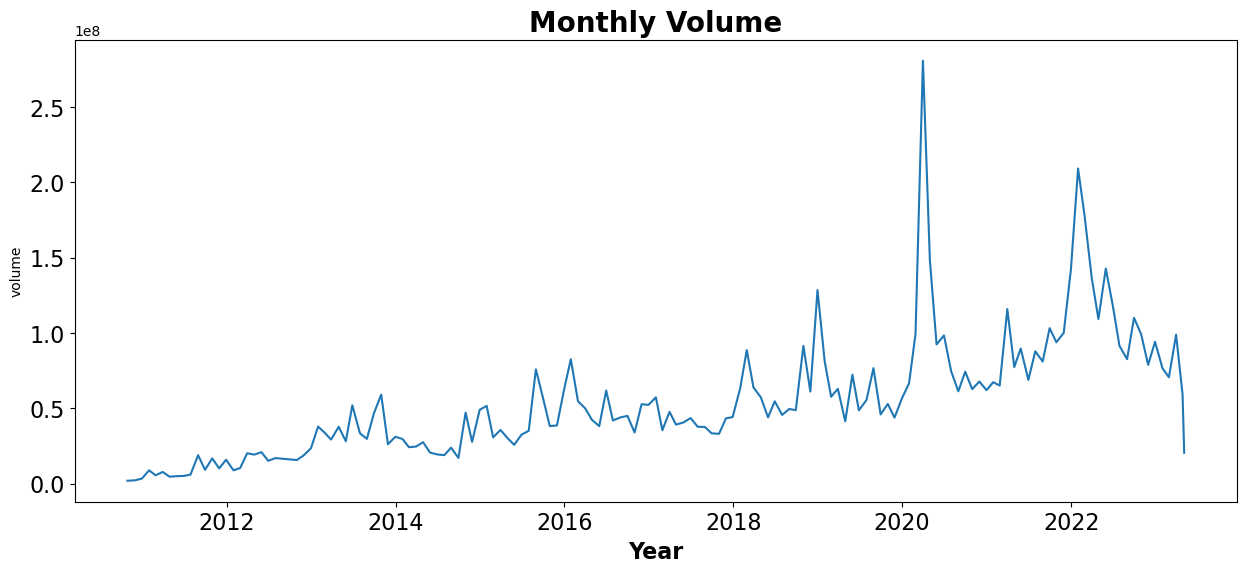

In [51]:
# Create a copy of the 'Date' and 'Volume' columns
y = valdats[['timestamp','volume']].copy()

# Set the index to 'timestamp' and convert it to datetime format
y.set_index('timestamp', inplace=True)
y.index = pd.to_datetime(y.index)

# Resample the time series to monthly and compute the mean of each month
y = y.resample('1M').mean()

# Add the 'timestamp' column back to the DataFrame
y['timestamp'] = y.index

# Plot the monthly volume time series
fig, ax = plt.subplots(figsize=(15, 6))
#sns.lineplot(y['timestamp'], y['volume'] )
sns.lineplot(values, x = 'timestamp', y = 'volume')

# Set the title and axes labels
ax.set_title('Monthly Volume', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

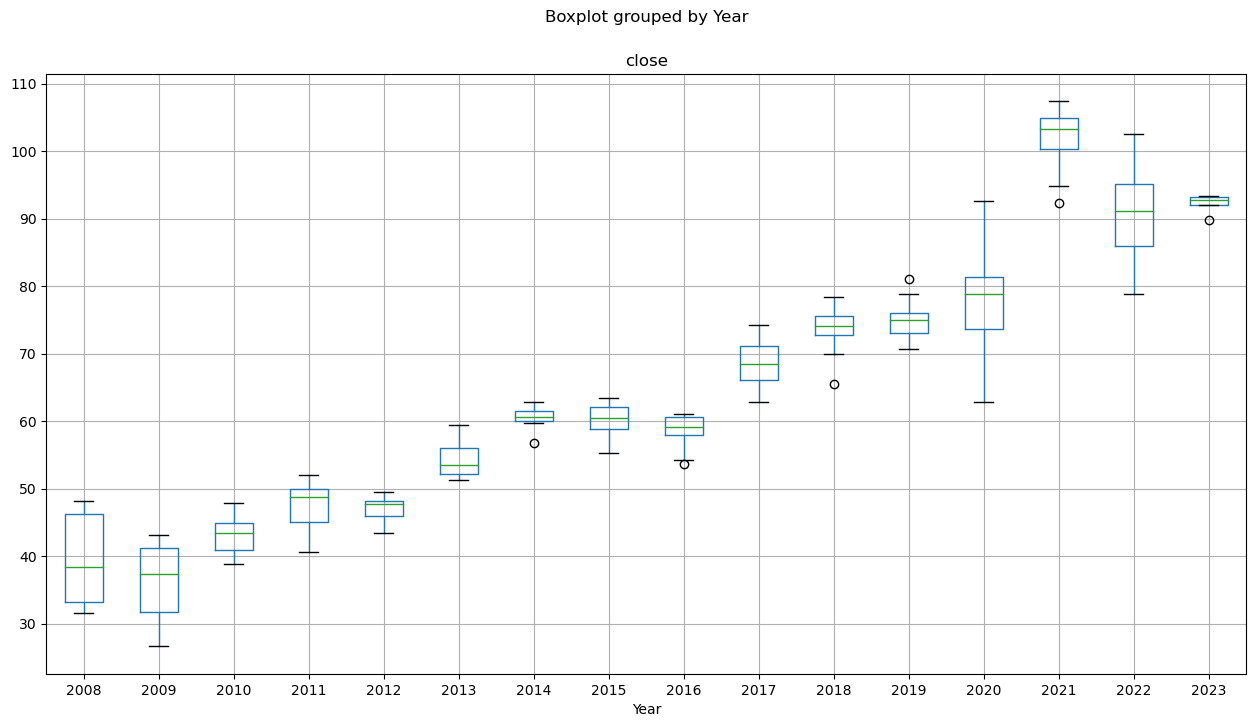

In [50]:
valdats.boxplot(column = 'close', by = 'Year', figsize = (15,8))
plt.show()

<Axes: xlabel='timestamp'>

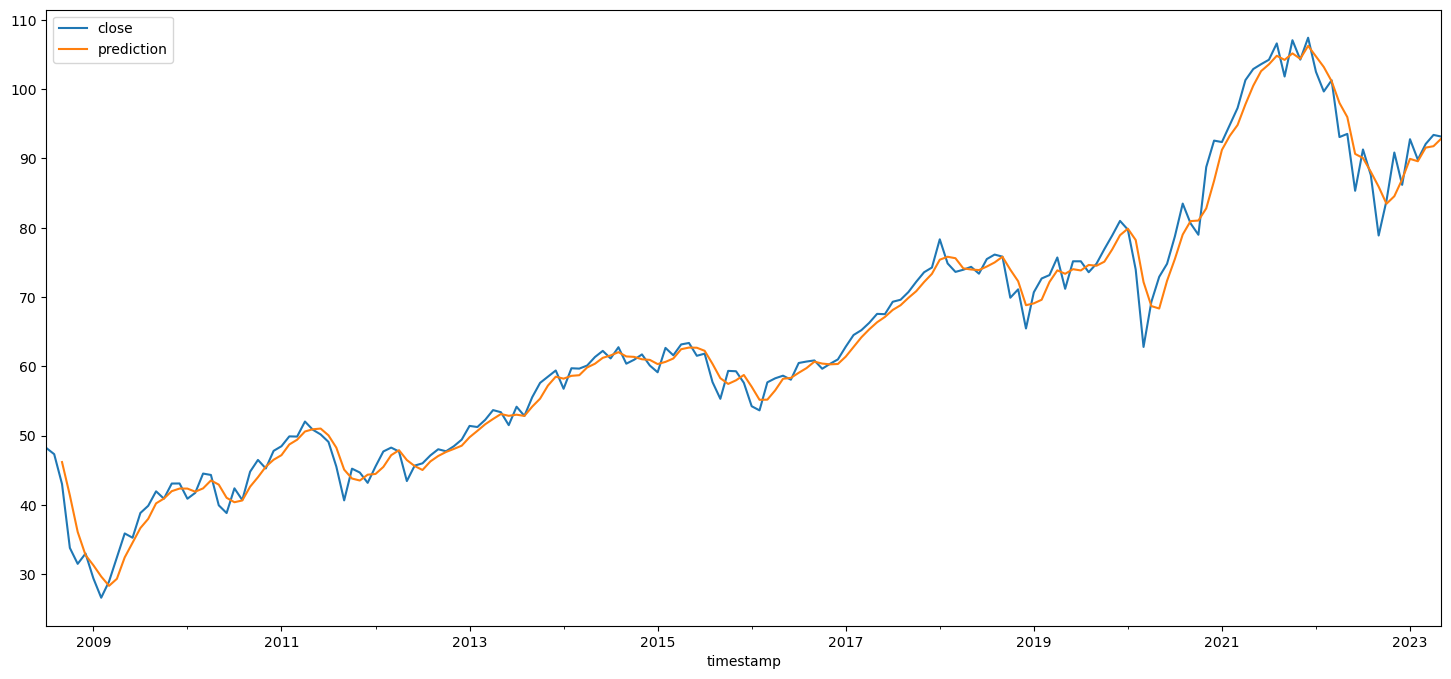

In [51]:
# Aggregating the Time Series to a monthly scaled index
y = valdats[['timestamp','close']].copy()
y.set_index('timestamp', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

# Compute rolling mean with window size of 3
y['prediction'] = y.rolling(window=3).mean() 

# Plot the resulting time series
y.plot(figsize=(18,8))

Text(0.5, 1.0, 'Correlation of stock closing price')

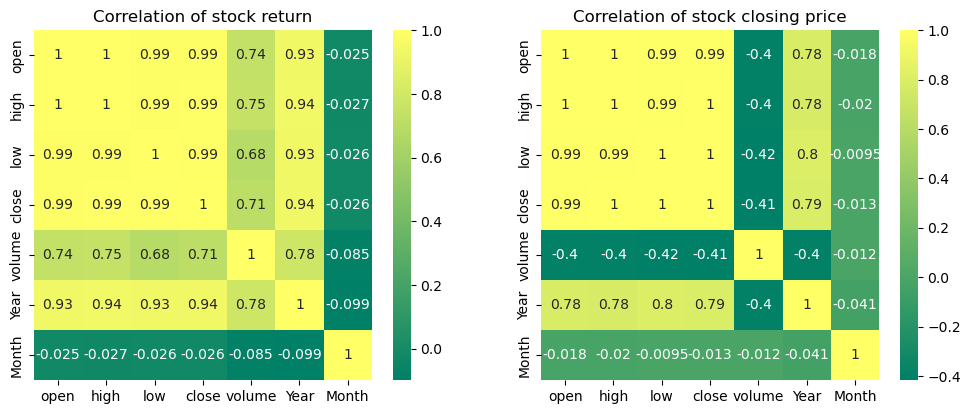

In [54]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(valdats.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(data.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')